# Исследование объявлений о продаже квартир

**Датафрейм:** данные сервиса Яндекс.Недвижимость — архивв объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Цель:** определение рыночной стоимости объектов недвижимости. 

**Задача:** определение параметров, оказывающие влияние на рыночную стоимость квартир.

**Результат:** работы позволит построить автоматизированную систему, которая позволит отслеживать аномалии и мошенническую деятельность. 

## Содержание

* [Предобработка и исследовательский анализ данных (EDA)](#chapter1)
    * [Описание даных](#section_1_1)
    * [Предобработка данных](#section_1_2)
* [Выявление ключевых признаков влияющих на стоимость квартир разного типа](#chapter2)
    * [Параметры продаваемых квартир](#section_2_1)
    * [Взаимосвязи между стоимостью и различными параметрами](#section_2_2)
    * [Взаимосвязи между стоимостью и различными параметрами](#section_2_2)
* [Описание квартир различного типа](#chapter3)    
    * [Квартиры в пригороде](#section_3_1)
    * [Квартиры в центре Петербурга](#section_3_2)
    * [Апартаменты, студии и свободные планировки](#section_3_3)
* [Выводы и рекомендации](#chapter4)    

## Предобработка и исследовательский анализ данных (EDA) <a class="anchor" id="chapter1"></a>

### Описание данных <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' , decimal='.')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df.shape

(23699, 22)

В исходном датасете 23699 строк, 22 столбца. Присутствуют пропуски в данных.

In [6]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

#### Комментарии

В датасете имеется информация о квартирах: количество фото в объявлении, стоимость, дата публикации и прочие ключевые характеристики продаваемых квартир. В данных есть пропуски, дубликаты отсутствуют.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Предобработка данных <a class="anchor" id="section_1_2"></a>

##### Количество дней в публикации

In [7]:
df['days_exposition'].isnull().sum()
df[df['days_exposition'].isnull() == 1].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,NaN,...,7.0,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,NaN,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,NaN,...,6.0,NaN,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,NaN,...,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,NaN,...,6.2,NaN,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,NaN,...,5.2,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Удалим объявления, с пропусками в графе с данными о сроке размещения в днях `days_exposition`. Такие объявления либо с ошибкой, либо квартиры не были проданы. Несмотря на то, что строк с пропущенными данными - 3181, что составляет 13%, пропуски могут исказить результаты (так как данные о квартирах могут не соответствовать рыночной стоимости и быть не интересным соискателям), потому, для решения задачи, некорректные данные лучше удалить.*

In [8]:
df = df.dropna(subset=['days_exposition'])
df['days_exposition'].isnull().sum()
df['days_exposition'] = df['days_exposition'].astype('int')
df.shape

(20518, 22)

In [9]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

*Все данные заполнены в графе `daya_exposition`. В среднем объявление находится на публикации 180 дней, межквартильный размах от 45 до 232 дней, максимально объяаление находилось в публикации 1580 дней. Посмотрим на распределение периода публикации.*

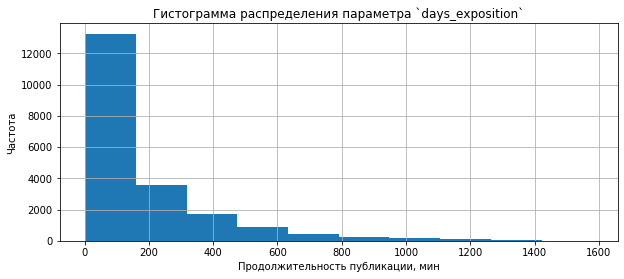

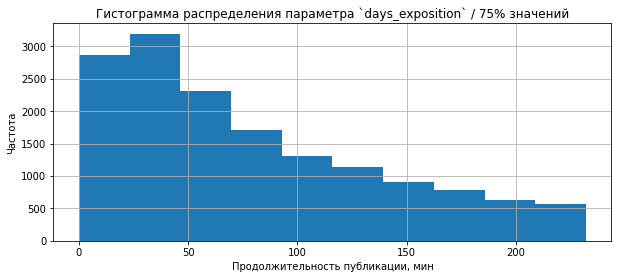

In [10]:
df['days_exposition'].hist(figsize=(10,4))
plt.title('Гистограмма распределения параметра `days_exposition`')
plt.xlabel('Продолжительность публикации, мин')
plt.ylabel('Частота')
plt.show()

df['days_exposition'].hist(range=(0, 232), figsize=(10,4))
plt.title('Гистограмма распределения параметра `days_exposition` / 75% значений')
plt.xlabel('Продолжительность публикации, мин')
plt.ylabel('Частота')
plt.show()

*Большинство квартир продаются в первые 180-200 дней.*

In [11]:
print(df[df['days_exposition'] < 232 ]['days_exposition'].count())
print(df[df['days_exposition'] < 3]['days_exposition'].count())

15384
4


*Согласно статистике, средняя продолжительность продажи квартиры на вторичном рынке - 3 месяца. Вероятно, квартиры, объявления о продаже которых находятся в публикации слишком долго или слишком мало, содержат некорректную информацию или данные в них не соответствуют принятому соотношению "цена-качество".*

##### Стоимость квартиры

*Ключевыми данными для решения задачи является стоимость квартир, именно влияние факторов требуется определить.*

In [12]:
print('Минимальная стоимость в выборке -', df['last_price'].min())
print('Максимальная стоимость в выборке -',df['last_price'].max())
print('Средняя стоимость в выборке -',df['last_price'].mean())
print('Средняя стоимость в выборке (медианное значение) -',df['last_price'].median())
print('Количество значений в выборке -',df['last_price'].count())

Минимальная стоимость в выборке - 12190.0
Максимальная стоимость в выборке - 763000000.0
Средняя стоимость в выборке - 6266172.5187152745
Средняя стоимость в выборке (медианное значение) - 4500000.0
Количество значений в выборке - 20518


*В данных о стоимость пропусков и арифметических ошибок не наблюдается. Приведем стоимость к целочисленному типу для удобства восприятия и дальнейшей категоризации.*

In [13]:
df['last_price'].describe()

count    2.051800e+04
mean     6.266173e+06
std      1.086298e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

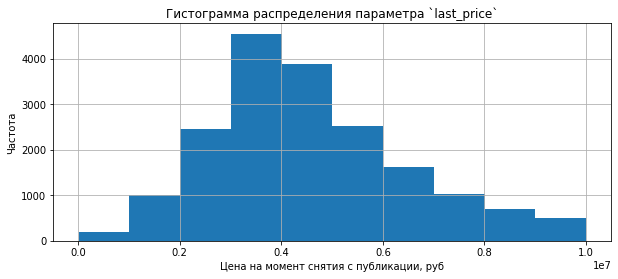

In [14]:
df['last_price'].hist(bins=10, range=(10000,10000000), figsize=(10,4))
plt.title('Гистограмма распределения параметра `last_price`')
plt.xlabel('Цена на момент снятия с публикации, руб')
plt.ylabel('Частота')
plt.show()

*Стоимость большинства квартир составляет от 2 млн. до 6 млн.*

In [15]:
df[(df["last_price"] < 6000000) & (df["last_price"] > 2000000)]["last_price"].count()

13299

*Стоимость 65% квартир составляет от 2млн. до 6 млн.*

In [16]:
# приведение к целочисленному типу
df['last_price'].astype('int')

1         3350000
2         5196000
3        64900000
4        10000000
5         2890000
           ...   
23691     9470000
23692     1350000
23693     4600000
23695     3100000
23697    11475000
Name: last_price, Length: 20518, dtype: int64

*Стоимость квартир `last_price` заменена на целочисленные значения.*

In [17]:
df[df['last_price'] == df['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33


In [18]:
df[df['last_price'] > 20000000]['last_price'].count()

510

*Квартиры слишком высокой стоимости не являются типичными и не подходит для оценки типичных квартир. Очистим выборку от выбросов позднее*

##### Фотографии в публикации

In [19]:
df['total_images'].count()

20518

Медиана - 9.0


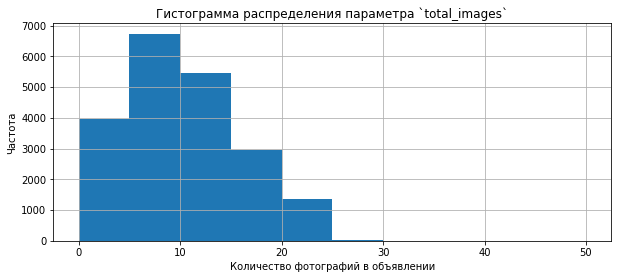

In [20]:
df['total_images'].hist(figsize=(10,4))
plt.title('Гистограмма распределения параметра `total_images`')
plt.xlabel('Количество фотографий в объявлении')
plt.ylabel('Частота')


print('Медиана -', df['total_images'].median())

*Пропусков в данных с количеством фото нет.*

In [21]:
df['total_images'].describe()

count    20518.000000
mean         9.610976
std          5.659554
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Text(0.5, 1.0, 'Диаграмма размаха параметра `total_images`')

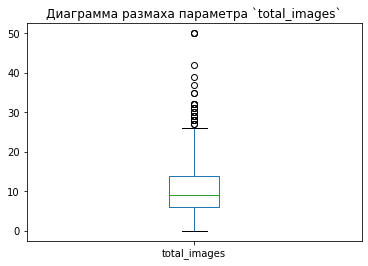

In [22]:
# ящик с усами
df['total_images'].plot.box()
plt.title('Диаграмма размаха параметра `total_images`')


##### Начеленный пункт

In [23]:
len(df['locality_name'].unique())

331

In [24]:
df['locality_name'].value_counts()

Санкт-Петербург               13638
посёлок Мурино                  517
посёлок Шушары                  408
Всеволожск                      339
Колпино                         308
                              ...  
поселок Красносельское            1
деревня Мины                      1
деревня Ялгино                    1
садовое товарищество Садко        1
посёлок Старая Малукса            1
Name: locality_name, Length: 330, dtype: int64

In [25]:
df['locality_name'].isna().sum()

48

*48 объявлений без указания населенного пункта*

In [26]:
df[df['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45


In [27]:
key_city = 17369.0 # расстояние до ближайшего центра города (проверим, есть ли указанные города на данном расстоянии)
df[df['cityCenters_nearest'] == key_city].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.8,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256
2846,4,2325000.0,27.8,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307


*К сожалению, нет возможности заполнить пропущенные населенные пункты взяв за основу равное расстрояние до центра города. При проверке выяснилось, что на одинаковом расстоянии от центра города находятся квартиры в разных городах, а для некоторых квартир, находящихся на определенном расстоянии от центра - нет аналогов в датасете с известным населенным пунктом.
Так как пропусков в датасете - 48, что составляет 0,2%, строки с пропусками можем удалить.*

In [28]:
df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'].isna().sum()
len(df['locality_name'])

20470

*Пропуски удалены, новое количество строк - 20 470*

##### Площадь квартиры

In [29]:
display(df['total_area'].isna().sum())
display(df['total_area'].describe())

0

count    20470.000000
mean        58.845355
std         34.080771
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64

*Пропуски в данных о площади квартиры устранены. Средняя площадь квартиры - 50.8 кв метров (медианное значение), максимальная площадь в выборке - 900 кв м - редко встречающееся явление и является выбросом.*

Text(0, 0.5, 'Частота')

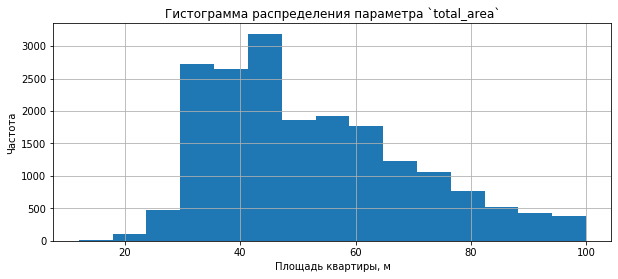

In [30]:
df['total_area'].hist(bins=15, range=(12, 100), figsize=(10,4))
plt.title('Гистограмма распределения параметра `total_area`')
plt.xlabel('Площадь квартиры, м')
plt.ylabel('Частота')

In [31]:
# оценка минимального и максимального значения
display(df[df['total_area'] == 12]) 
display(df[df['total_area'] == df['total_area'].max()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106


In [32]:
print(df[df['total_area'] > 300]['total_area'].count())
df[df['total_area'] > 300].head(10)

48


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,NaN,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,NaN,...,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418
1085,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.00,5.0,255.7,4,NaN,...,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719
1494,10,65000000.0,364.0,2018-11-27T00:00:00,7,3.90,6.0,250.0,3,NaN,...,20.0,NaN,Санкт-Петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,NaN,...,NaN,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599
2580,6,30900000.0,338.6,2017-10-16T00:00:00,7,3.86,6.0,230.0,4,NaN,...,20.0,NaN,Санкт-Петербург,24957.0,5641.0,0.0,NaN,0.0,NaN,406
5042,20,35000000.0,380.0,2017-08-17T00:00:00,6,NaN,3.0,198.0,2,NaN,...,50.0,0.0,Пушкин,18490.0,30643.0,1.0,527.0,1.0,668.0,15


*Квартиры с очень большой площадью, хоть и не типичны, однако соотношение "цена-качество" выглядит реалистично.*

In [33]:
df['total_area'].astype('int')

1         40
2         56
3        159
4        100
5         30
        ... 
23691     72
23692     30
23693     62
23695     59
23697     76
Name: total_area, Length: 20470, dtype: int64

*В датасете присутствуют все данные о площади квартиры. В среднем, площадь составляет 50.8 кв метров. Эти данные мы проверим в соотвествии с населенным пунктом, а также, установим корреляции цены с основными параметрами.*

##### День публикации

In [34]:
df['first_day_exposition'].head()

1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
Name: first_day_exposition, dtype: object

In [35]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition']

1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
5       2018-09-10
           ...    
23691   2016-10-13
23692   2017-07-07
23693   2016-08-05
23695   2018-01-15
23697   2017-03-28
Name: first_day_exposition, Length: 20470, dtype: datetime64[ns]

In [36]:
df['weekday_post'] = df['first_day_exposition'].dt.weekday

*Формат даты значений даты публикации переведен в формат даты. Пропусков в данных нет.*

##### Количество комнат

In [37]:
df['rooms'].describe()

count    20470.000000
mean         2.023889
std          1.054972
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [38]:
df['rooms'].isnull().sum()

0

Text(0, 0.5, 'Количество комнат')

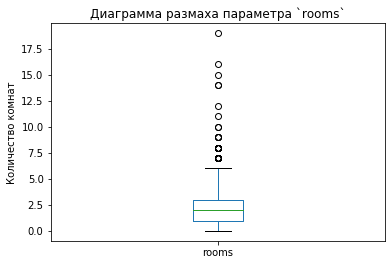

In [39]:
df['rooms'].plot.box()
plt.title('Диаграмма размаха параметра `rooms`')
plt.ylabel('Количество комнат')

In [40]:
df[df['rooms'] == 0]['rooms'].count()

183

In [41]:
df[df['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181,3
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45,2
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64,0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430,1
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,2


In [42]:
no_rooms = df.query('rooms == 0')
no_rooms.pivot_table(index= 'studio', values='total_area', aggfunc={'count', 'mean'})

,count,mean
studio,,
False,59,32.707288
True,124,27.625645


In [43]:
no_rooms = df.query('rooms == 0')
no_rooms.pivot_table(index= 'open_plan', values='total_area', aggfunc={'count', 'mean'})

,count,mean
open_plan,,
False,124,27.625645
True,59,32.707288


*Квартиры с нулевой комнатностью являются либо студиями (124), либо квартирами со свободной планировкой (59). Всего таких в выборке 183.*

*Данные о количестве комнат заполнены, среднее количество комнат - 2. По большей части, в квартирах 1-3 комнаты, максимальное значение - 19, является сильным выбросом.*

##### Количество этажей в доме

In [44]:
# количество пропусков
df['floors_total'].isnull().sum()

76

In [45]:
# пропуски
df[df['floors_total'].isnull() == 1].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49,1
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251,2
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727,5
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123,3
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77,5


In [46]:
df[df['floors_total'] == df['floors_total'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166,3


In [47]:
df[df['locality_name'] == "Кронштадт"]['floors_total'].median()

5.0

In [48]:
# В Кронштадте отсутствую здания свыше 20 этажей, а среднее количество этажей - 5. Ввероятнее всего допущена ошибка набора: 
# вместо 6 этажа, указан 60. Квартира расположена на 4 этаже, что подтверждает предположение об ошибке. Исправим ошибку.
df.loc[2253, 'floors_total'] = 6

In [49]:
df[df['floors_total'] > 37]['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

In [50]:
# единственное здание в Петербурге выше 37 этажей - Лидер Тауэр (42 этажа) не является жилым.
df[df['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,...,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45,0


In [51]:
# Квартира на 37 таже не является апартаментами, присутствует ошибка, исправить которую не представляется возможным.
# Удалим строку из датасета.
df.drop(16731, inplace=True)

In [52]:
df[df['floors_total'] == df['floors_total'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71,1


In [53]:
# 37ми этажные здания в Петербурге есть. Количество многотажных зданий.
df[df['floors_total'] > 25]['locality_name'].count()

299

In [54]:
df['floors_total'].describe()

count    20393.000000
mean        10.858628
std          6.634792
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

In [55]:
df['floors_total'].isnull().sum()

76

In [56]:
# замена пропуском медианным значением этажности в зависимости от города расположения
df['floors_total'] = df['floors_total'].fillna(df.groupby('locality_name')['floors_total'].transform('median'))

In [57]:
# проверка возможных ошибок
df[df['floor'] > df['floors_total']].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
457,4,9788348.0,70.80,2015-08-01,2,NaN,9.0,38.40,12,NaN,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727,5
2392,7,5395770.0,53.00,2017-06-29,2,NaN,9.0,29.00,22,NaN,...,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48,3
2846,4,2325000.0,27.80,2016-09-21,1,NaN,9.0,19.40,15,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307,2
4617,4,4275062.0,61.20,2017-04-27,2,NaN,9.0,32.00,12,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72,3
4848,15,13000000.0,98.00,2017-02-08,3,NaN,9.0,NaN,18,NaN,...,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29,2
5146,10,3085024.0,33.33,2018-10-06,1,NaN,9.0,11.00,12,NaN,...,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140,5
5784,4,4262941.0,59.90,2017-04-02,2,NaN,9.0,31.70,18,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127,6
5958,1,3200000.0,30.30,2018-09-07,0,NaN,9.0,NaN,13,NaN,...,NaN,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68,4
6030,3,10900000.0,116.23,2017-05-05,4,NaN,9.0,NaN,24,NaN,...,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83,4
7922,3,5426412.0,50.11,2016-06-08,2,NaN,9.0,26.94,24,NaN,...,0.0,Санкт-Петербург,7050.0,13266.0,1.0,868.0,0.0,NaN,14,2


In [58]:
# После замены пропусков средним значением, появились огибки в данных - этаж предывает количество этажей в доме. 
# Заменим эти значения значением крайнего этажа

df.loc[df['floors_total'] < df['floor'], 'floors_total'] = df.loc[df['floors_total'] < df['floor'], 'floor']

Text(0, 0.5, 'Количество этажей')

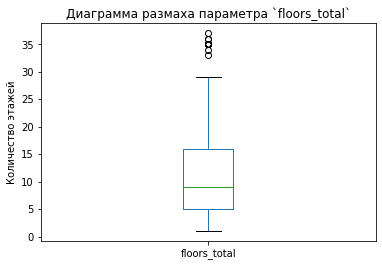

In [59]:
df['floors_total'].plot.box()
plt.title('Диаграмма размаха параметра `floors_total`')
plt.ylabel('Количество этажей')

In [60]:
df['floors_total'] = df['floors_total'].astype('int')
df['floors_total'].head()

1    11
2     5
3    14
4    14
5    12
Name: floors_total, dtype: int64

##### Этаж

In [61]:
df['floor'].isnull().sum()

0

In [62]:
print('Минимальный этаж в выборке -', df['floor'].min())
print('Максимальный этаж в выборке -',df['floor'].max())
print('Средний этаж в выборке -',df['floor'].mean())
print('Средний этаж в выборке (медианное значение) -',df['floor'].median())
print('Количество значений в выборке -',df['floor'].count())

Минимальный этаж в выборке - 1
Максимальный этаж в выборке - 33
Средний этаж в выборке - 5.9876398456202065
Средний этаж в выборке (медианное значение) - 4.0
Количество значений в выборке - 20469


In [63]:
df['floor'].describe()

count    20469.000000
mean         5.987640
std          4.941192
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Text(0, 0.5, 'Этаж')

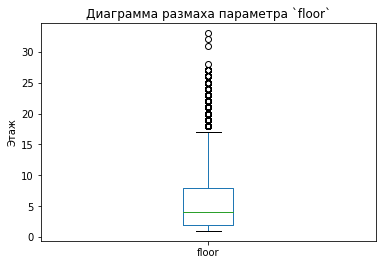

In [64]:
df['floor'].plot.box()
plt.title('Диаграмма размаха параметра `floor`')
plt.ylabel('Этаж')

*Все данные об этаже присутствуют в данных. Большинство квартир располагаются на 2-8 этаже, что обусловлено небольшой этажностью Ленинградской области.*

##### Высота потолков

In [65]:
df['ceiling_height'].describe()

count    12036.000000
mean         2.761548
std          1.264501
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [66]:
df[df['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19,2


In [67]:
# удалим выброс
df = df[df['ceiling_height'] != 100]

In [68]:
df['ceiling_height'].describe()

count    12035.000000
mean         2.753468
std          0.901840
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         27.500000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Частота')

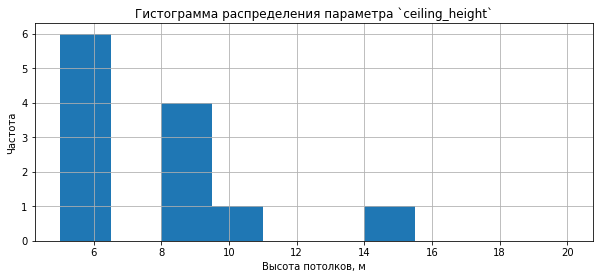

In [69]:
df['ceiling_height'].hist(range=(5,20), figsize=(10,4))
plt.title('Гистограмма распределения параметра `ceiling_height`')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')

In [70]:
# Слишком высокие потолки вероятнее всего ошибка. Высота более 20 метром может быть опечаткой, так как дома многоквартирные 
# так как минимальная высота потолков 2.4 метра, исправим вероятную ошибку переносом запятой
print(df[df['ceiling_height'] > 24]['ceiling_height'].count())
df[df['ceiling_height'] > 24].head()

14


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259,3
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,NaN,...,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181,3
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28,2
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,NaN,...,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540,4
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,NaN,...,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267,1


In [71]:
df.loc[df['ceiling_height'] >= 24, 'ceiling_height'] = df['ceiling_height'] / 10

In [72]:
df['ceiling_height'].describe()

count    12035.000000
mean         2.724191
std          0.362758
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         22.600000
Name: ceiling_height, dtype: float64

In [73]:
df[df['ceiling_height'] == df['ceiling_height'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
20507,12,5950000.0,60.0,2018-02-19,2,22.6,14,35.0,11,NaN,...,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40,0


In [74]:
print(df[df['ceiling_height'] > 5]['ceiling_height'].count())
df[df['ceiling_height'] > 5].head()

12


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
464,15,66571000.0,280.3,2015-06-11,6,5.2,8,159.5,7,NaN,...,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578,3
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6,NaN,6,NaN,...,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719,2
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125,4
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,NaN,...,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14,2
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5,NaN,5,NaN,...,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8,3


In [75]:
df.groupby('floors_total')['ceiling_height'].median()

floors_total
1     2.80
2     2.70
3     2.75
4     2.95
5     2.55
6     3.00
7     2.95
8     2.80
9     2.55
10    2.60
11    2.75
12    2.65
13    2.70
14    2.60
15    2.70
16    2.70
17    2.70
18    2.70
19    2.75
20    2.75
21    2.70
22    2.75
23    2.75
24    2.75
25    2.75
26    2.70
27    2.65
28    2.60
29    2.60
33     NaN
34    2.65
35    2.70
36    2.70
37    1.75
Name: ceiling_height, dtype: float64

In [76]:
# замена пропущенных значений медианным в зависимости от этажности дома
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))

In [77]:
# Проверим ошибку
df.groupby('floors_total')['ceiling_height'].median()

floors_total
1     2.80
2     2.70
3     2.75
4     2.95
5     2.55
6     3.00
7     2.95
8     2.80
9     2.55
10    2.60
11    2.75
12    2.65
13    2.70
14    2.60
15    2.70
16    2.70
17    2.70
18    2.70
19    2.75
20    2.75
21    2.70
22    2.75
23    2.75
24    2.75
25    2.75
26    2.70
27    2.65
28    2.60
29    2.60
33     NaN
34    2.65
35    2.70
36    2.70
37    1.75
Name: ceiling_height, dtype: float64

In [78]:
# Для 33х этажного дома нет медианного значения, заменим пропущенное значение медианой высоты потолков по всему датасету
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [79]:
df['ceiling_height'].describe()

count    20468.000000
mean         2.702589
std          0.290722
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         22.600000
Name: ceiling_height, dtype: float64

##### Жилая площадь

In [80]:
df['living_area'].isnull().sum()

1700

In [81]:
df['living_area'].describe()

count    18768.000000
mean        33.527972
std         21.323306
min          2.000000
25%         18.300000
50%         30.000000
75%         41.600000
max        409.700000
Name: living_area, dtype: float64

In [82]:
df[df['living_area'].isnull() == 1][['total_area', 'kitchen_area', 'rooms', 'balcony', 'is_apartment']]

,total_area,kitchen_area,rooms,balcony,is_apartment
3,159.00,NaN,3,0.0,NaN
30,32.80,NaN,1,NaN,NaN
37,45.80,NaN,2,NaN,NaN
59,46.50,NaN,1,NaN,NaN
60,35.00,NaN,1,NaN,NaN
...,...,...,...,...,...
23642,80.30,NaN,3,NaN,NaN
23663,88.00,NaN,4,NaN,NaN
23670,45.60,NaN,1,NaN,NaN
23679,35.00,NaN,1,NaN,NaN


In [83]:
df.pivot_table(index='rooms', values='living_area', aggfunc={'count', 'median'})

,count,median
rooms,,
0,171,18.00
1,6659,17.60
2,6317,30.40
3,4415,44.80
4,854,63.00
5,223,92.00
6,71,133.40
7,35,151.40
8,11,162.00


In [84]:
# замена пропущенных значений на медианное в зависимости от количества комнат
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

In [85]:
df['living_area'].isnull().sum()

0

In [86]:
df[df['total_area'] < df['living_area']]['living_area'].count()

28

In [87]:
# После замены пропусков средним значением, появились ошибки в данных - этаж предывает количество этажей в доме. 
# Заменим эти значения значением крайнего этажа
df.loc[df['living_area'] > df['total_area'], 'living_area'] = df.loc[df['living_area'] > df['total_area'],\
                                                                     'total_area']

*28 ошибок в результате заполнения данных. Параметр жилой площади нужен для расчета соотношения жилой и нежилой площади, для оценки влияния стомости не используется, цену квадратного метра не исказит. Однако, значения в данных строках заменим на общую площадь.*

In [88]:
df['living_area'].describe()

count    20468.000000
mean        33.408588
std         20.965729
min          2.000000
25%         18.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

*Все пропуски в данных о площади устранены.*

##### Площадь кухни

In [89]:
df['kitchen_area'].isnull().sum()

2066

In [90]:
df[df['kitchen_area'].isnull() == 1][['living_area', 'total_area', 'rooms']]

,living_area,total_area,rooms
3,44.8,159.0,3
30,17.6,32.8,1
37,30.4,45.8,2
59,17.6,46.5,1
60,17.6,35.0,1
...,...,...,...
23642,44.8,80.3,3
23655,19.6,40.5,1
23663,63.0,88.0,4
23670,17.6,45.6,1


In [91]:
# Заменим пропуски в столбце жилой площадью медианным значением в зависимости от количества комнат
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'))

In [92]:
df['kitchen_area'].isnull().sum()

183

In [93]:
# Проверим, где остались пропуски
df[df['kitchen_area'].isnull() == 1].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
144,1,2450000.0,27.00,2017-03-30,0,2.75,24,15.50,2,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181,3
349,4,2320000.0,25.00,2017-09-27,0,2.60,14,17.00,1,NaN,...,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45,2
440,8,2480000.0,27.11,2018-03-12,0,2.70,17,24.75,4,NaN,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64,0
508,0,3375000.0,34.40,2017-03-28,0,2.70,26,24.30,19,NaN,...,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430,1
608,2,1850000.0,25.00,2019-02-20,0,2.60,10,18.00,7,NaN,...,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,2


In [94]:
df.groupby('rooms')['kitchen_area'].median()

rooms
0        NaN
1       9.01
2       8.80
3       9.50
4      11.00
5      15.25
6      20.00
7      20.00
8      25.50
9      32.90
10     24.90
11     11.90
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [95]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

*Пропуски остались в квартирах с нулевой комнатностью. Как мы помним, это студии или квартиры со свободной планировкой. Пропуски тут уместны, однако значения заменим нулями.*

##### Студия

In [96]:
df['studio'].mean()

0.006595661520422122

*6% квартир в датафрейме - студии*

##### Апартаменты

In [97]:
df['is_apartment'].value_counts()

False    2447
True       37
Name: is_apartment, dtype: int64

In [98]:
df[df['is_apartment'] == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
916,11,8183000.0,70.0,2018-01-11,2,3.12,3,40.00,3,True,...,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179,3
1109,1,34878556.0,95.8,2014-12-09,2,3.00,6,58.30,5,True,...,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572,1
1608,12,2150000.0,20.1,2019-01-30,1,2.55,9,17.60,1,True,...,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13,2
2759,11,7500000.0,152.0,2018-07-27,3,3.00,3,44.80,1,True,...,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7,4
2975,9,4931398.0,42.9,2018-07-23,1,3.15,4,20.39,3,True,...,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273,0


In [99]:
# Невозможно определить является ли квартира апартаментами по данным в другим столбцам. Однако, апартаменты - коммерческая 
# недвижимость, пригодная для жилья. Такой формат является редкостью. Потому пропуски заменим параметром False.
df['is_apartment'] = df['is_apartment'].fillna(False)

In [100]:
df['is_apartment'].value_counts()

False    20431
True        37
Name: is_apartment, dtype: int64

In [101]:
df['is_apartment'].mean()

0.0018076998241156929

*В выборке менее процента апартаментов.*

##### Свободная планировка

In [102]:
print(df['open_plan'].count())
print()
print(df['open_plan'].value_counts())

20468

False    20401
True        67
Name: open_plan, dtype: int64


*Пропусков в данных о свободной планировке нет, переменная содержит булевые данные.*

##### Количество балконов

In [103]:
df['balcony'].describe()

count    11065.000000
mean         1.095346
std          1.055681
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [104]:
df['balcony'].isnull().sum()

9403

In [105]:
# Заменим пропуски в количестве балконов медианным значением среди квартир, расположенных на одинаковом этаже
df['balcony'] = df['balcony'].fillna(df.groupby('floor')['balcony'].transform('median'))

In [106]:
df.loc[df['balcony'].isnull(), 'balcony'] = df['balcony'].median()
print('Новое количество пропусков - ', df['balcony'].isnull().sum())

Новое количество пропусков -  0


##### Расстояние до аэропорта

In [107]:
print(df['airports_nearest'].isnull().sum())
print(df['airports_nearest'].median())
print(df['airports_nearest'].mean())

4668
26786.0
28851.537151898734


In [108]:
df[df['airports_nearest'].isnull() == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,2
12,10,3890000.0,54.00,2016-06-30,2,2.55,5,30.00,5,False,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90,3
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60,0
30,12,2200000.0,32.80,2018-02-19,1,2.55,9,17.60,2,False,...,1.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,8,2450000.0,35.00,2018-10-26,1,2.60,5,18.00,4,False,...,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28,4
23679,0,2500000.0,35.00,2017-12-08,1,2.55,9,17.60,4,False,...,1.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45,4
23682,11,2350000.0,35.60,2016-06-23,1,2.50,5,17.00,4,False,...,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40,3
23692,2,1350000.0,30.00,2017-07-07,1,2.55,5,17.50,4,False,...,1.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413,4


In [109]:
# Пропуски в расстоянии до аэропорта заполним медианным значением, потому что рассматриваем только Ленинградскую область.
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
print('Новое количество пропусков - ', df['airports_nearest'].isnull().sum())

Новое количество пропусков -  0


In [110]:
print(df['airports_nearest'].median())

26786.0


##### Расстояние до центра

In [111]:
print(df['cityCenters_nearest'].isnull().sum())
print(df['cityCenters_nearest'].median())
print(df['cityCenters_nearest'].mean())

4646
13169.0
14301.240487928202


In [112]:
# Пропуски в расстоянии до центра заполним медианным значением, аналогично предыдущему пункту.
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())
print('Новое количество пропусков - ', df['cityCenters_nearest'].isnull().sum())

Новое количество пропусков -  0


##### Парки и водооемы в округе

In [113]:
print('Количество пропусков в данных о парках -',df['parks_around3000'].isna().sum())
print('Количество пропусков в данных о водооемах -',df['ponds_nearest'].isna().sum())

Количество пропусков в данных о парках - 4646
Количество пропусков в данных о водооемах - 12600


In [114]:
df[df['parks_around3000'].isna() == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,1.0,городской посёлок Янино-1,26786.0,13169.0,NaN,NaN,NaN,NaN,55,0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,2.0,посёлок Мурино,26786.0,13169.0,NaN,NaN,NaN,NaN,189,2
12,10,3890000.0,54.00,2016-06-30,2,2.55,5,30.00,5,False,...,0.0,Сертолово,26786.0,13169.0,NaN,NaN,NaN,NaN,90,3
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,2.0,деревня Кудрово,26786.0,13169.0,NaN,NaN,NaN,NaN,60,0
30,12,2200000.0,32.80,2018-02-19,1,2.55,9,17.60,2,False,...,1.0,Коммунар,26786.0,13169.0,NaN,NaN,NaN,NaN,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,8,2450000.0,35.00,2018-10-26,1,2.60,5,18.00,4,False,...,1.0,Всеволожск,26786.0,13169.0,NaN,NaN,NaN,NaN,28,4
23679,0,2500000.0,35.00,2017-12-08,1,2.55,9,17.60,4,False,...,1.0,Сосновый Бор,26786.0,13169.0,NaN,NaN,NaN,NaN,45,4
23682,11,2350000.0,35.60,2016-06-23,1,2.50,5,17.00,4,False,...,2.0,Выборг,26786.0,13169.0,NaN,NaN,NaN,NaN,40,3
23692,2,1350000.0,30.00,2017-07-07,1,2.55,5,17.50,4,False,...,1.0,Тихвин,26786.0,13169.0,NaN,NaN,NaN,NaN,413,4


*Данные о парках и водооемах заполняются автоматически. Отсутствие данных в базе скорее всего обусловлено отсутствием парков и водоемов в округе. Данные записи заполнять нет нужды.*

##### Цена квадратного метра

In [115]:
# добавим цену квадратного метра
df['price_m'] = df['last_price'] / df ['total_area']
print(df['price_m'].describe())

count    2.046800e+04
mean     9.800731e+04
std      4.763517e+04
min      1.118349e+02
25%      7.647059e+04
50%      9.407094e+04
75%      1.121665e+05
max      1.907500e+06
Name: price_m, dtype: float64


In [116]:
print(df['price_m'].min())
print(df['price_m'].max())
print(df['price_m'].mean())
print(df['price_m'].median())

111.8348623853211
1907500.0
98007.30754577648
94070.93534212178


In [117]:
df[df['price_m'] == df['price_m'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_post,price_m
12971,19,763000000.0,400.0,2017-09-30,7,2.6,10,250.0,10,False,...,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33,5,1907500.0


##### День недели, месяц, год публикации объявления

In [118]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [119]:
def weekday_post(day):
    if day == 0:
        return('Понедельник')
    if day == 1:
        return('Вторник')
    if day == 2:
        return('Среда')
    if day == 3:
        return('Четверг')
    if day == 4:
        return('Пятница')
    if day == 5:
        return('Суббота')
    if day == 6:
        return('Воскресенье')
df['weekday_post'] = df['weekday'].apply(weekday_post)

In [120]:
df[['first_day_exposition','weekday','weekday_post']]

,first_day_exposition,weekday,weekday_post
1,2018-12-04,1,Вторник
2,2015-08-20,3,Четверг
3,2015-07-24,4,Пятница
4,2018-06-19,1,Вторник
5,2018-09-10,0,Понедельник
...,...,...,...
23691,2016-10-13,3,Четверг
23692,2017-07-07,4,Пятница
23693,2016-08-05,4,Пятница
23695,2018-01-15,0,Понедельник


In [121]:
df['month_post'] = df['first_day_exposition'].dt.month

In [122]:
df['year_post'] = df['first_day_exposition'].dt.year

In [123]:
df[['first_day_exposition','weekday','weekday_post', 'month_post', 'year_post']]

,first_day_exposition,weekday,weekday_post,month_post,year_post
1,2018-12-04,1,Вторник,12,2018
2,2015-08-20,3,Четверг,8,2015
3,2015-07-24,4,Пятница,7,2015
4,2018-06-19,1,Вторник,6,2018
5,2018-09-10,0,Понедельник,9,2018
...,...,...,...,...,...
23691,2016-10-13,3,Четверг,10,2016
23692,2017-07-07,4,Пятница,7,2017
23693,2016-08-05,4,Пятница,8,2016
23695,2018-01-15,0,Понедельник,1,2018


##### Этаж расположения квартиры

In [124]:
def floor_type(row):
    if row['floor'] == 1:
        return('первый')
    elif row['floor'] == row['floors_total']:
        return('последний')
    else:
        return('другой')

df['floor_type'] = df.apply(floor_type, axis=1)

In [125]:
df[['floor','floors_total','floor_type']].head(25)

,floor,floors_total,floor_type
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой
11,4,5,другой


##### Соотношение жилой и общей площади, отношение площади кухни к общей

In [126]:
#Соотношение жилой площади к общей
df['living_ratio'] = df['living_area'] / df['total_area']
df['living_ratio'].mean()

0.5620436577301469

In [127]:
df['living_ratio'].describe()

count    20468.000000
mean         0.562044
std          0.109367
min          0.021583
25%          0.487981
50%          0.563636
75%          0.636364
max          1.000000
Name: living_ratio, dtype: float64

In [128]:
# Обратное соотношения дают квартиры, у которых после заполнения жилой площади, площадь квартиры оказалась меньше жилой площади.
df[df['living_ratio'] > 1]['living_ratio'].count()

0

In [129]:
#Соотношение площади кухни к общей
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']
df['kitchen_ratio'].mean()

0.18853408105615646

In [130]:
df['kitchen_ratio'].describe()

count    20468.000000
mean         0.188534
std          0.075624
min          0.000000
25%          0.134685
50%          0.175000
75%          0.234375
max          0.787879
Name: kitchen_ratio, dtype: float64

In [131]:
df['city_km'] = df['cityCenters_nearest'] / 1000

## Выявление ключевых признаков влияющих на стоимость квартир разного типа <a class="anchor" id="chapter2"></a>

### Параметры продаваемых квартир <a class="anchor" id="section_2_1"></a>

In [132]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'weekday_post', 'price_m',
       'weekday', 'month_post', 'year_post', 'floor_type', 'living_ratio',
       'kitchen_ratio', 'city_km'],
      dtype='object')

In [133]:
df_list = df[['last_price', 'price_m', 'total_area', 'living_area', 'rooms', 'ceiling_height']]

In [134]:
df_describe = df[['last_price', 'price_m', 'total_area', 'living_area', 'rooms', 'ceiling_height']].describe()
df_describe

,last_price,price_m,total_area,living_area,rooms,ceiling_height
count,2.046800e+04,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000
mean,6.264490e+06,9.800731e+04,58.847929,33.408588,2.023989,2.702589
std,1.087390e+07,4.763517e+04,34.081360,20.965729,1.054975,0.290722
min,1.219000e+04,1.118349e+02,12.000000,2.000000,0.000000,1.000000
25%,3.400000e+06,7.647059e+04,39.500000,18.000000,1.000000,2.550000
50%,4.500000e+06,9.407094e+04,50.800000,30.000000,2.000000,2.650000
75%,6.500000e+06,1.121665e+05,67.800000,42.000000,3.000000,2.750000
max,7.630000e+08,1.907500e+06,900.000000,409.700000,19.000000,22.600000


*По всем параметрам присутствуют существенные выбросы. Так, стандартное отклонение параметров общей и жилой площади стремится к среднему значению, что показывает сильную неоднородность данных. Большой размах у квартир по стоимости, однако при оценки стоимости в пересчете на квадратный метр, наблюдается нормальное распределению.*

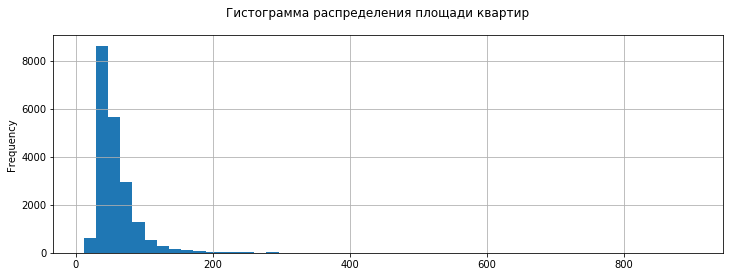

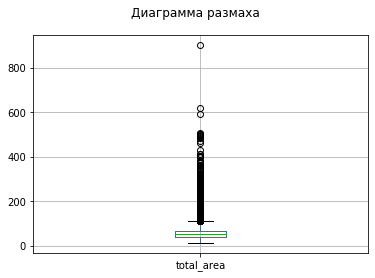

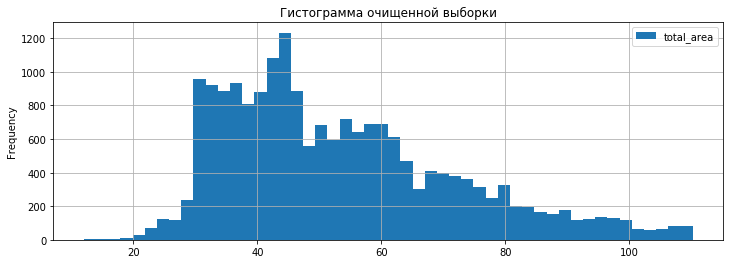

In [135]:
# Общая площадь продаваемых квартир
df['total_area'].plot(kind='hist', grid=True, bins=50, figsize=(12,4))
plt.suptitle('Гистограмма распределения площади квартир')
plt.show()

df.boxplot('total_area')
plt.suptitle('Диаграмма размаха')
plt.show()

q1 = df_describe['total_area']['25%']
q3 = df_describe['total_area']['75%']

iqr = q3 - q1

min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr

df_trust_area = (df
                 .query('@min_value <= total_area <= @max_value')
                 .plot(kind='hist', y='total_area', title='Гистограмма очищенной выборки', grid=True, bins=50, figsize=(12,4))
                )


Графики для параментра last_price


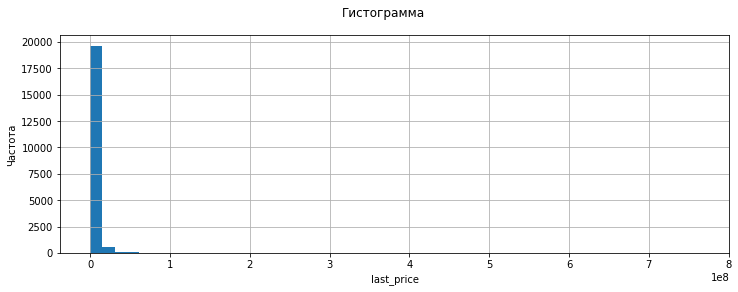

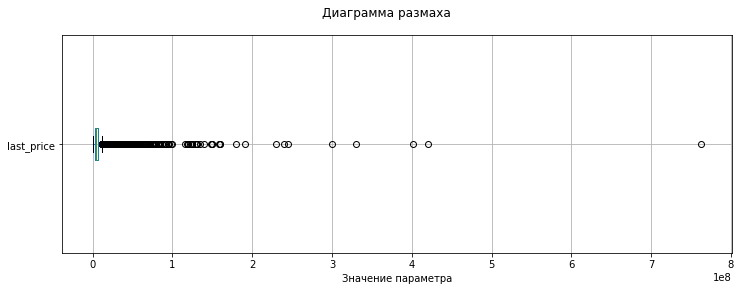

Среднее (медианное) значение в выборке- 4500000.0
Значения параметра last_price менее 12190.0 и более 11150000.0 считаются выбросами.

Графики для параментра price_m


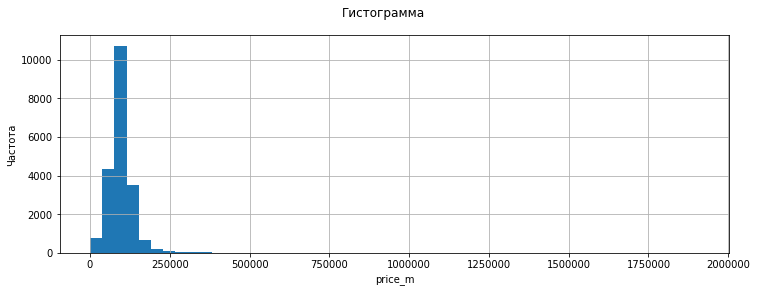

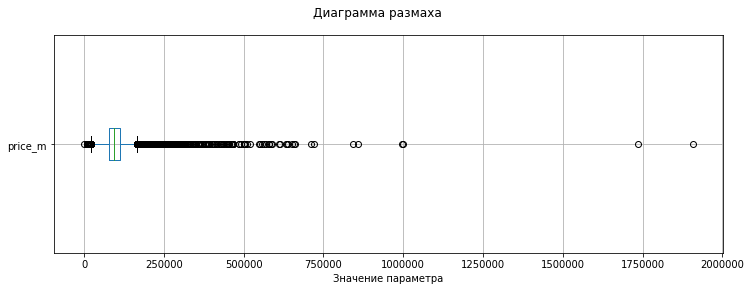

Среднее (медианное) значение в выборке- 94070.93534212178
Значения параметра price_m менее 22926.73 и более 165710.35 считаются выбросами.

Графики для параментра total_area


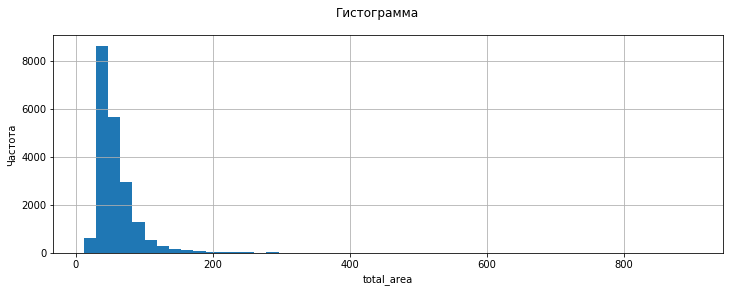

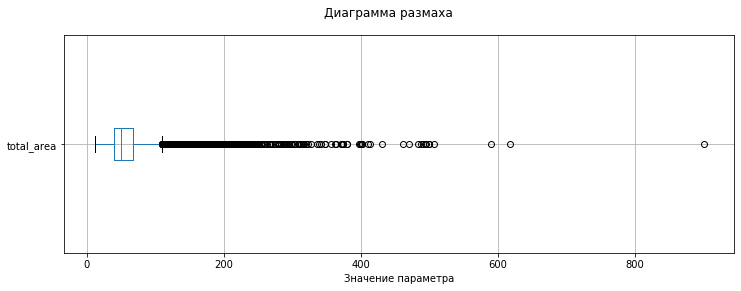

Среднее (медианное) значение в выборке- 50.8
Значения параметра total_area менее 12.0 и более 110.25 считаются выбросами.

Графики для параментра living_area


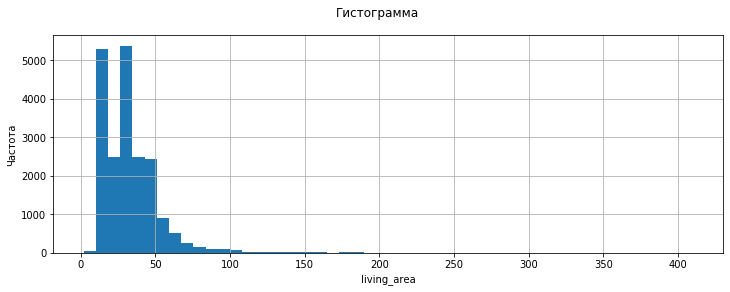

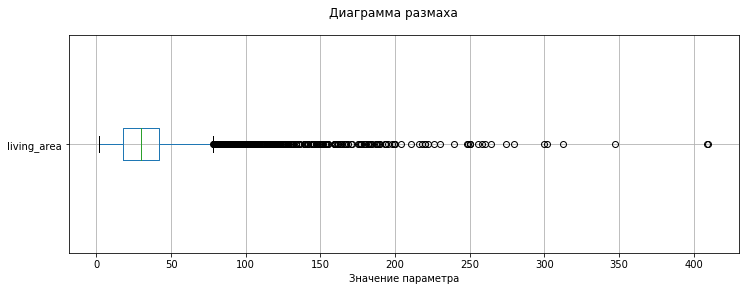

Среднее (медианное) значение в выборке- 30.0
Значения параметра living_area менее 2.0 и более 78.0 считаются выбросами.

Графики для параментра rooms


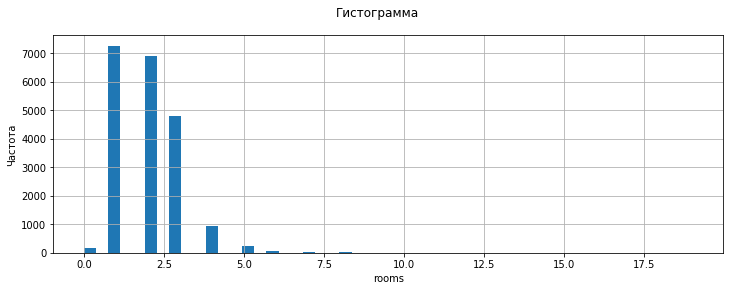

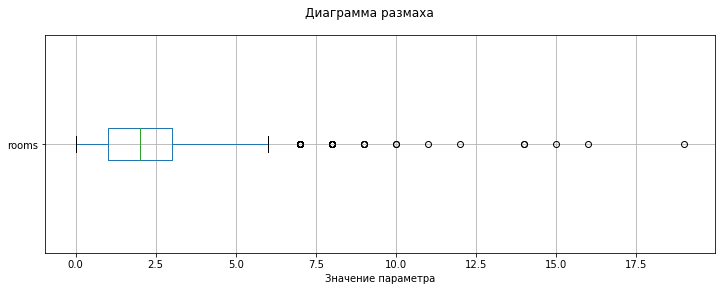

Среднее (медианное) значение в выборке- 2.0
Значения параметра rooms менее 0.0 и более 6.0 считаются выбросами.

Графики для параментра ceiling_height


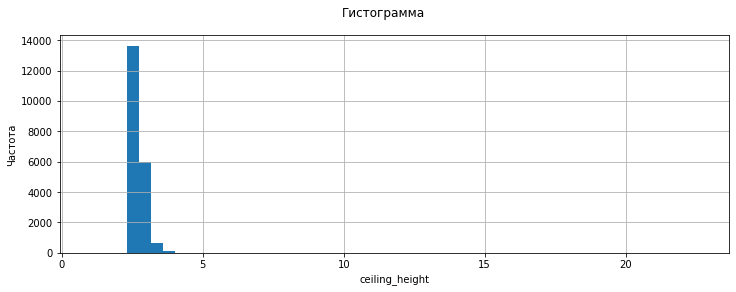

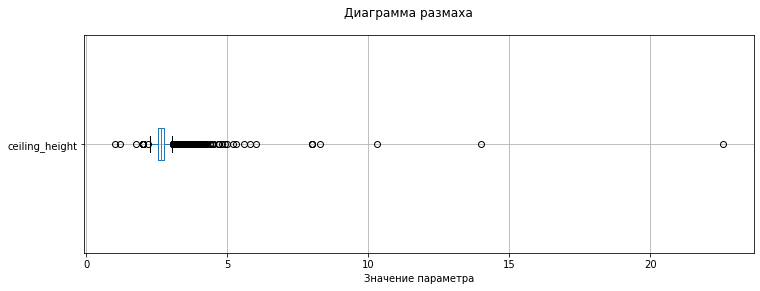

Среднее (медианное) значение в выборке- 2.65
Значения параметра ceiling_height менее 2.25 и более 3.05 считаются выбросами.



In [136]:
# графики для ключевых параментров

df_list = df[['last_price', 'price_m', 'total_area', 'living_area', 'rooms', 'ceiling_height']]
df_describe = df[['last_price', 'price_m', 'total_area', 'living_area', 'rooms', 'ceiling_height']].describe()

for parametr in df_list:
    q1 = df_describe[parametr]['25%']
    q3 = df_describe[parametr]['75%']
    iqr = q3 - q1
    
    print('Графики для параментра', parametr)
    min_value = max(df_describe[parametr]['min'], q1 - 1.5 * iqr).round(2)
    max_value = min(df_describe[parametr]['max'], q3 + 1.5 * iqr).round(2)
    
    df[parametr].plot(kind='hist', grid=True, bins=50, figsize=(12,4))
    plt.suptitle('Гистограмма')
    plt.xlabel(parametr)
    plt.ylabel('Частота')
    plt.show()
    
    df.boxplot(column=parametr, vert=False, figsize=(12,4))
    plt.suptitle('Диаграмма размаха')
    plt.xlabel('Значение параметра')
    plt.show()
    
    # df[parametr].plot(kind='hist', grid=True, bins=50, range=(min_value,max_value), figsize=(12,4))
    print('Среднее (медианное) значение в выборке-', df[parametr].median())
    print('Значения параметра', parametr, 'менее', min_value, 'и более', max_value, 'считаются выбросами.')
    print()
    


In [137]:
# очищенная от выбросов выборка
df_trust_data = df.query('(12190 <= last_price <= 11150000.0) and (12 <= total_area <= 110.25) and (2 <= living_area <= 78) and (rooms <= 6) and (2.25 <= ceiling_height <= 3.05)')
df_trust_data[['last_price', 'price_m', 'total_area', 'living_area', 'rooms', 'ceiling_height']].describe()

,last_price,price_m,total_area,living_area,rooms,ceiling_height
count,1.797800e+04,17978.000000,17978.000000,17978.000000,17978.000000,17978.000000
mean,4.592899e+06,90889.291490,51.126257,29.068680,1.854211,2.651930
std,1.983039e+06,28321.151897,16.671351,11.945232,0.862232,0.134651
min,1.219000e+04,111.834862,12.000000,2.000000,0.000000,2.250000
25%,3.250000e+06,74335.526316,38.000000,18.000000,1.000000,2.550000
50%,4.250000e+06,91597.217399,47.000000,28.600000,2.000000,2.600000
75%,5.600000e+06,107346.684508,61.100000,37.000000,2.000000,2.750000
max,1.115000e+07,312240.000000,110.200000,78.000000,6.000000,3.050000


In [138]:
df[['last_price', 'price_m', 'total_area', 'living_area', 'rooms', 'ceiling_height']].describe()

,last_price,price_m,total_area,living_area,rooms,ceiling_height
count,2.046800e+04,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000
mean,6.264490e+06,9.800731e+04,58.847929,33.408588,2.023989,2.702589
std,1.087390e+07,4.763517e+04,34.081360,20.965729,1.054975,0.290722
min,1.219000e+04,1.118349e+02,12.000000,2.000000,0.000000,1.000000
25%,3.400000e+06,7.647059e+04,39.500000,18.000000,1.000000,2.550000
50%,4.500000e+06,9.407094e+04,50.800000,30.000000,2.000000,2.650000
75%,6.500000e+06,1.121665e+05,67.800000,42.000000,3.000000,2.750000
max,7.630000e+08,1.907500e+06,900.000000,409.700000,19.000000,22.600000


*В отдельный датафрейм выделены наиболее типичные квартиры, значения ключевых параметров которых очищены от выбросов. В новом датафрейме 17 976 строк (89% выборки). 
Новый датафрейм исключает сильные выбросы, например, квартиры, стоимость квадратного метра которых, составляет 1,9 млн, а также 19 комнатный квартиры (которые скорее дома) и 23 метровые потолки. 
Данные нового датафрейма будет корректно использовать для оценки взаимосвязей показателей.*

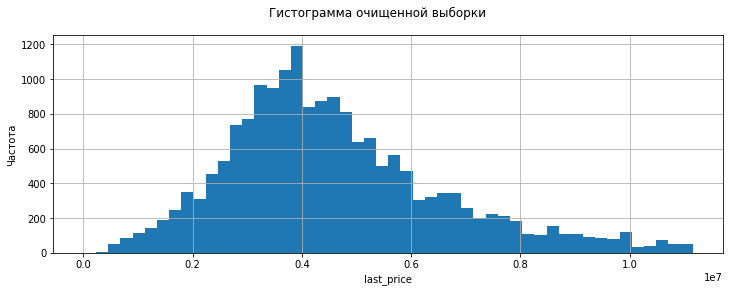

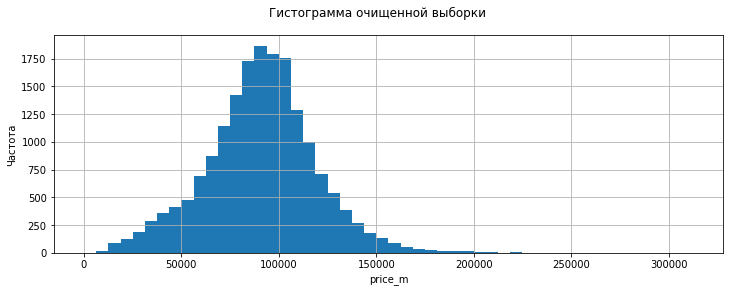

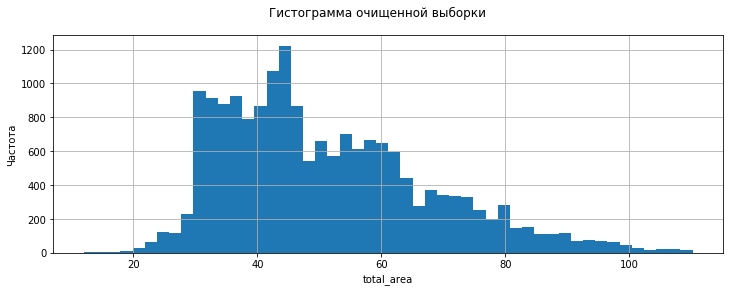

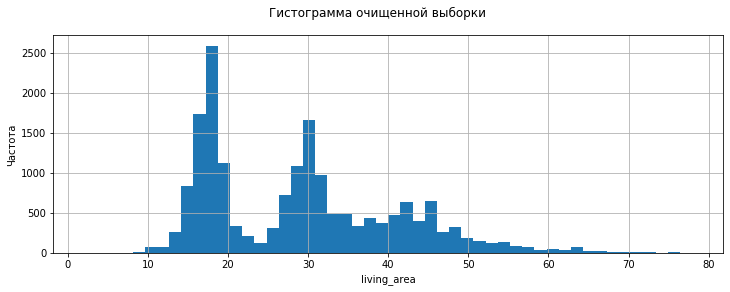

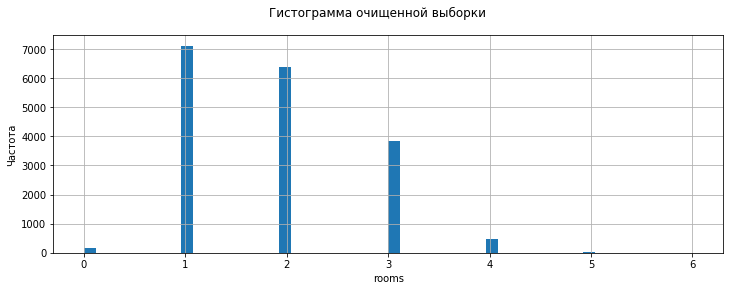

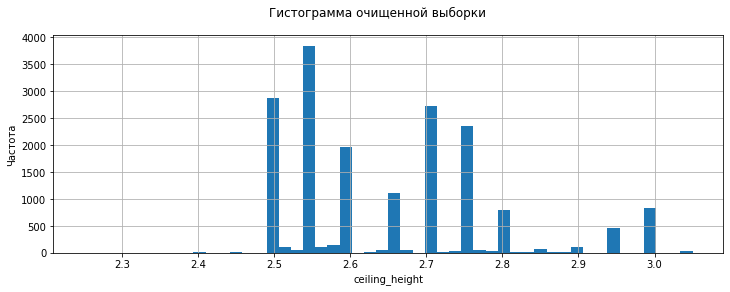

In [139]:
#гистограммы распределения для очищенной выбрки
for parametr in df_list:
    df_trust_data[parametr].plot(kind='hist', grid=True, bins=50, figsize=(12,4))
    plt.suptitle('Гистограмма очищенной выборки')
    plt.xlabel(parametr)
    plt.ylabel('Частота')
    plt.show()

*Теперь, для очищенной выборки, можно сказать, что значения параметров распределены нормально. Чаще всего предлагаются к покупке квартиры стоимостью от 2 до 6 млн, со средней стоисомтью квардратного метра 90 тыс. Наиболее распростронены квартиры площадью 38-61 метр квадратный, как правило, это 1-2 комнатный квартиры, чуть реже 3 комнатные. Типичная высота потолков от 2,5 до 2,7 метров, также встречаются квартиры с высотой потолков до 2,8 метров.*

Text(0, 0.5, 'Частота')

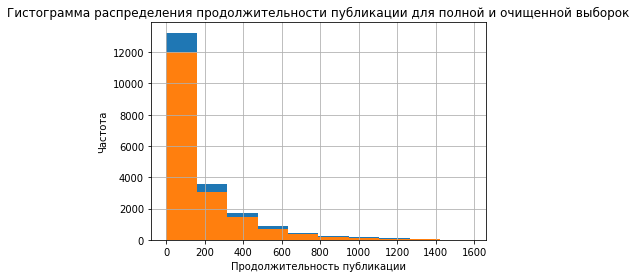

In [140]:
# сравнение очищенной и не очищенной выборки
df['days_exposition'].hist()
df_trust_data['days_exposition'].hist()
plt.title('Гистограмма распределения продолжительности публикации для полной и очищенной выборок')
plt.xlabel('Продолжительность публикации')
plt.ylabel('Частота')

In [141]:
# сравнение очищенной и не очищенной выборки
print(df['days_exposition'].describe())
print()
print(df_trust_data['days_exposition'].describe())

count    20468.000000
mean       180.767735
std        219.783696
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

count    17978.000000
mean       169.085215
std        207.140776
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Частота')

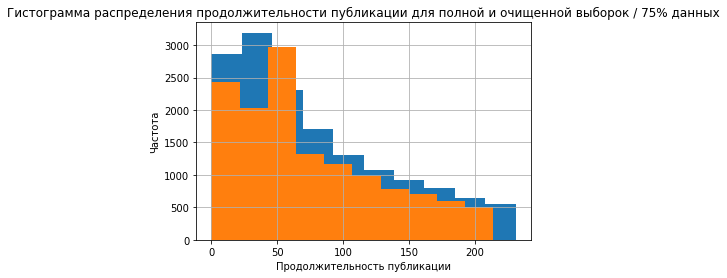

In [142]:
# сравнение очищенной и не очищенной выборки
# ограничим продажи 3 квантилем
df['days_exposition'].hist(range = (0,231))
df_trust_data['days_exposition'].hist(range = (0,214))
plt.title('Гистограмма распределения продолжительности публикации для полной и очищенной выборок / 75% данных')
plt.xlabel('Продолжительность публикации')
plt.ylabel('Частота')

*В среднем квартиры продаются в течении первых двух месяцев. Это справедливо как для общей выборки, так и для квартир типичных. Типичные квартиры имеют пик продаж ближе к концу второго месяца, в то время, как медианное значение всего датафрейма приходится на начало-середину второго месяца. Вероятнее всего, данный факт обусловлен аномальными параметрими, такими как низкая цена. Продажи свыше 7 месяцев выглядят долгими, продажи свыше года кажутся очень долгими.*

### Взаимосвязи между стоимостью и различными параметрами <a class="anchor" id="section_2_2"></a>

In [143]:
df_general_columns = df_trust_data[['price_m','last_price', 'total_area', 'living_area', 'rooms', 'floor', 'ceiling_height', 
                         'cityCenters_nearest', 'month_post', 'kitchen_ratio']]
df_general_columns.corr().round(2)


,price_m,last_price,total_area,living_area,rooms,floor,ceiling_height,cityCenters_nearest,month_post,kitchen_ratio
price_m,1.00,0.62,-0.11,-0.21,-0.26,0.26,0.22,-0.19,0.01,0.27
last_price,0.62,1.00,0.68,0.52,0.42,0.16,0.30,-0.19,0.01,-0.13
total_area,-0.11,0.68,1.00,0.89,0.80,-0.02,0.17,-0.06,0.00,-0.42
living_area,-0.21,0.52,0.89,1.00,0.91,-0.14,0.04,-0.05,-0.00,-0.60
rooms,-0.26,0.42,0.80,0.91,1.00,-0.18,-0.06,-0.03,-0.00,-0.57
floor,0.26,0.16,-0.02,-0.14,-0.18,1.00,0.14,-0.02,0.02,0.24
ceiling_height,0.22,0.30,0.17,0.04,-0.06,0.14,1.00,-0.13,-0.00,0.16
cityCenters_nearest,-0.19,-0.19,-0.06,-0.05,-0.03,-0.02,-0.13,1.00,-0.01,-0.02
month_post,0.01,0.01,0.00,-0.00,-0.00,0.02,-0.00,-0.01,1.00,0.00
kitchen_ratio,0.27,-0.13,-0.42,-0.60,-0.57,0.24,0.16,-0.02,0.00,1.00


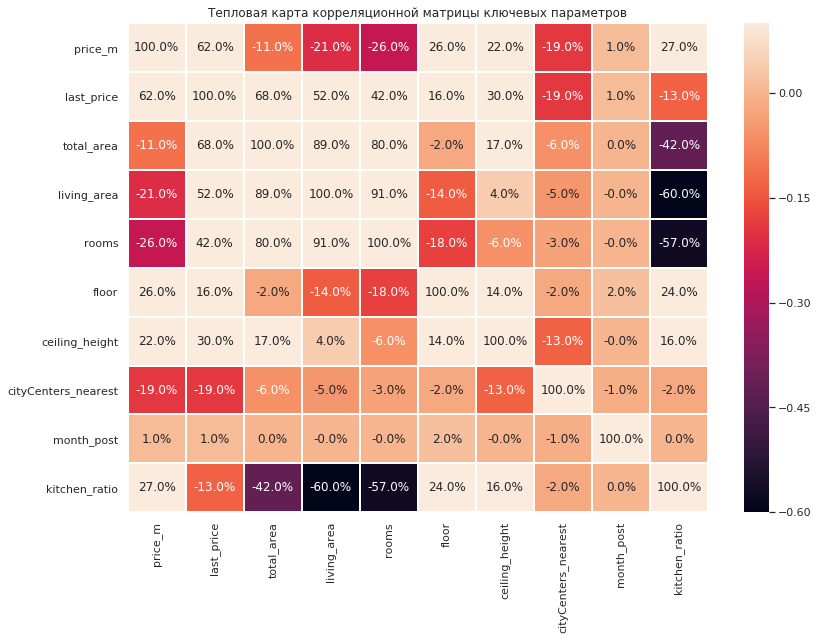

In [144]:
import seaborn as sns
ht = df_general_columns.corr().round(2)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта корреляционной матрицы ключевых параметров')
sns.heatmap(ht, vmax=0.1, annot=True, fmt='.1%', linewidths=1, linecolor='white')

*На стоимость продажи в наибольшей степени влияет площадь квартиры, также имеет влияние количество комнат и высота потолков. Отрицательную корреляция наблюдается меджду стоимостью квадратного метра и близостью к центру. Однако зависимость не сильная.*

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Стоимость квадратного метра')

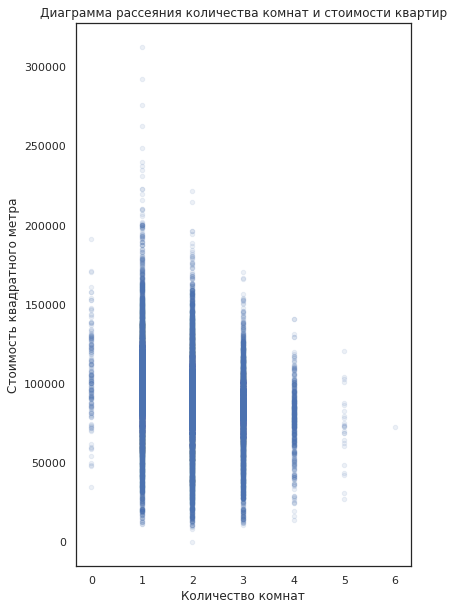

In [145]:
df_trust_data.plot(x='rooms', y='price_m', kind='scatter', figsize=(6, 10), alpha=0.1)
plt.title('Диаграмма рассеяния количества комнат и стоимости квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квадратного метра')

*Как мы помним, с нулевой комнатностью в выборке представлены студии и апартаменты. Стоимость квадратного метра у этих квартир высокая, однако, этих квартир меньше всего. Стоимоть квадратного метра выше у 1 и 2 комнатных квартир. Общая стоимость квартир прямо пропорциональна количеству комнат.*

Text(0, 0.5, 'Стоимость квадратного метра')

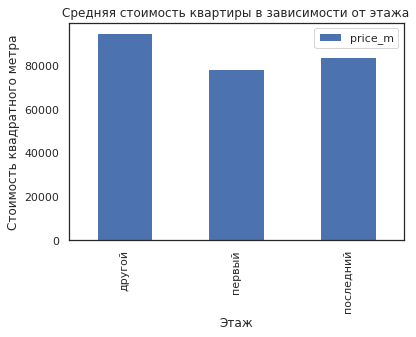

In [146]:
(df_trust_data
 .pivot_table(index = 'floor_type', values = 'price_m', aggfunc = 'median')
 .plot(kind='bar',title = 'Средняя стоимость квартиры в зависимости от этажа')
)
plt.xlabel('Этаж')
plt.ylabel('Стоимость квадратного метра')

 *Стоимость квартир на первой и последнем этажах меньше, чем у прочих квартир. В особенности, у квартир, расположенных на 1м этаже.*

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


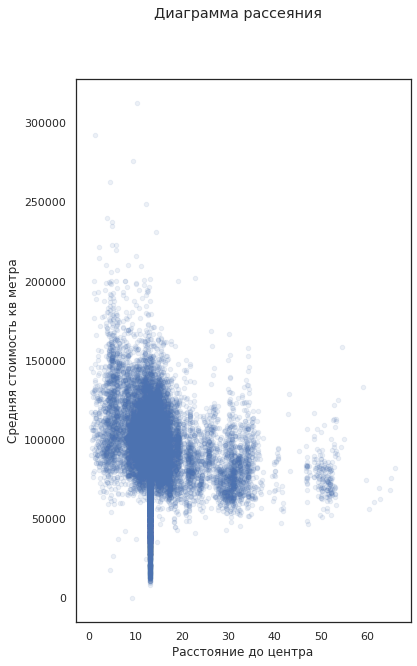

In [147]:
df_trust_data.plot(x='city_km', y='price_m', kind='scatter', figsize=(6, 10), alpha=0.1)
plt.suptitle('Диаграмма рассеяния')
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя стоимость кв метра')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


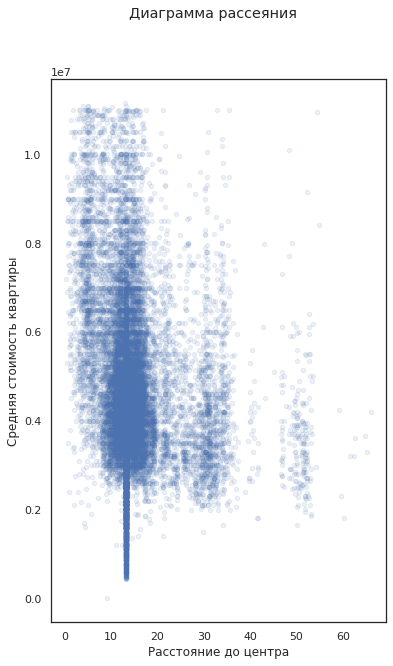

In [148]:
df_trust_data.plot(x='city_km', y='last_price', kind='scatter', figsize=(6, 10), alpha=0.1)
plt.suptitle('Диаграмма рассеяния')
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя стоимость квартиры')
plt.show()

*Стоимость квартир обратно пропорциональна удаленности от центра города.*

             price_m  last_price   weekday  month_post  year_post
price_m     1.000000    0.618147 -0.002916    0.006285   0.069896
last_price  0.618147    1.000000 -0.002776    0.006395  -0.012783
weekday    -0.002916   -0.002776  1.000000    0.009607   0.004843
month_post  0.006285    0.006395  0.009607    1.000000  -0.198815
year_post   0.069896   -0.012783  0.004843   -0.198815   1.000000


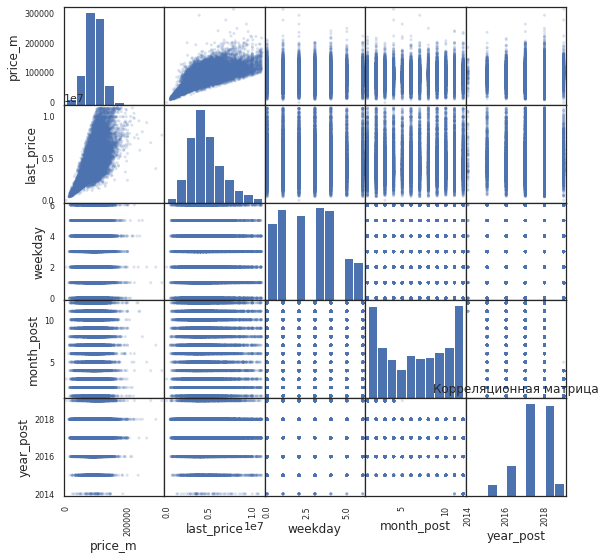

In [149]:
df_date = df_trust_data[['price_m','last_price', 'weekday', 'month_post', 'year_post']]
print(df_date.corr())
pd.plotting.scatter_matrix(df_date, alpha =0.2, figsize = (9,9))
plt.title('Корреляционная матрица')
plt.show()

*Среди временных факторов можно отметить влияние года публикации на цену: так, с годами стоимость квартир растет (наравне с количеством публикаций) 
Также, стоит отметить, что большинство публикаций о продаже квартир происходит в начале и конце года, с заметным провалом во втором квартале. Также, квартиры чаще публикуют к продаже на будних днях с падением к выходным.*

## Описание квартир различного типа <a class="anchor" id="chapter3"></a>

### Квартиры в пригороде <a class="anchor" id="section_3_1"></a>

,last_price,price_m
locality_name,,
посёлок Мурино,517,85818.383555
посёлок Шушары,408,78010.167480
Всеволожск,339,68570.615292
Колпино,308,74865.364347
Пушкин,307,102074.629153
посёлок Парголово,302,89505.043917
деревня Кудрово,299,92473.547576
Гатчина,268,67928.326990
Выборг,208,57084.582948


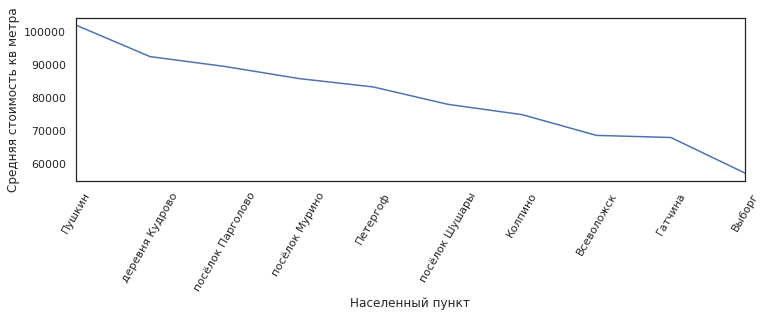

In [150]:
# цена квадратного метра
countryside = df.query('locality_name != "Санкт-Петербург"')
countryside_data = countryside.groupby('locality_name').agg({'last_price' : 'count', 'price_m' : 'mean'})
countryside_data = countryside_data.sort_values(by = 'last_price', ascending = False).head(10)
display(countryside_data)
countryside_data = countryside_data.sort_values(by='price_m', ascending = False)['price_m'].plot(figsize=(12,3))
plt.xticks(rotation = 60)
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя стоимость кв метра')
plt.show()

*Наибольшая стоимость квартир в Ленинградскоц области в городе Пушкин, затем следует Кудрово и Парголово, что по сути является часть города наравне с Мурино.*

### Квартиры в центре Петербурга <a class="anchor" id="section_3_2"></a>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Среднее значение не в центре - 6.734080936128717 / Медиана - 5.0
Среднее значение в центре города - 3.861842105263158 / Медиана - 3.0


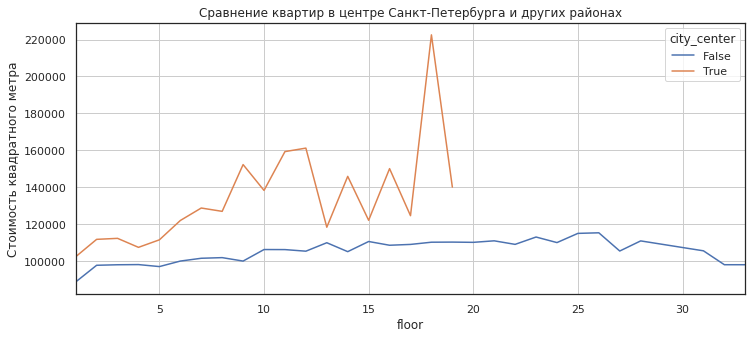

---------------------------------------------------------------------------------------

Среднее значение не в центре - 12.509215017064847 / Медиана - 10.0
Среднее значение в центре города - 6.953007518796992 / Медиана - 5.0


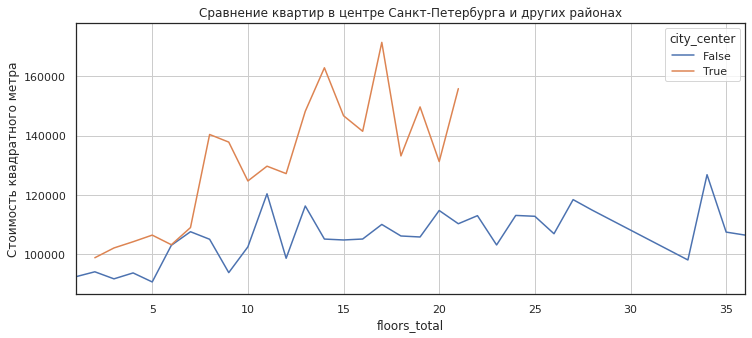

---------------------------------------------------------------------------------------

Среднее значение не в центре - 1.8555826426133593 / Медиана - 2.0
Среднее значение в центре города - 2.1898496240601504 / Медиана - 2.0


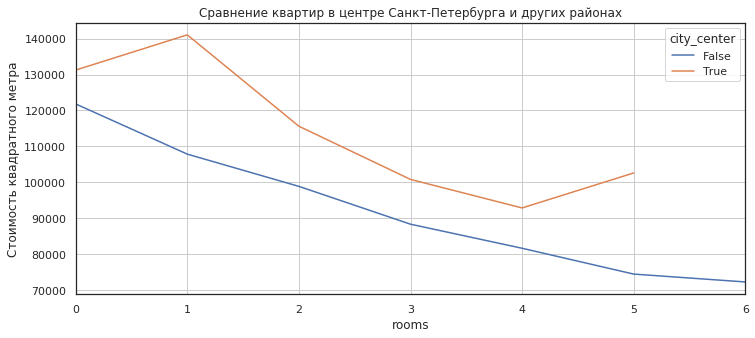

---------------------------------------------------------------------------------------

Среднее значение не в центре - 0.49267578125 / Медиана - 0.0
Среднее значение в центре города - 0.8806390977443609 / Медиана - 1.0


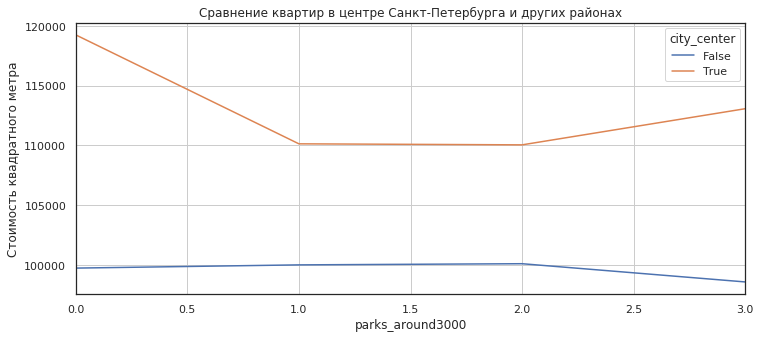

---------------------------------------------------------------------------------------

Среднее значение не в центре - 0.59921875 / Медиана - 0.0
Среднее значение в центре города - 1.281954887218045 / Медиана - 1.0


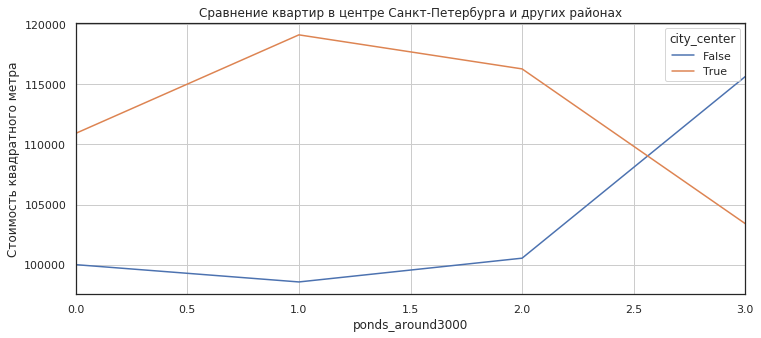

---------------------------------------------------------------------------------------



In [151]:
# Ограничим центр Петербурга радиусом 6 км
df_trust_data['city_center'] = df_trust_data['city_km'] <= 6
df_trust_data_spb = df_trust_data.query('locality_name == "Санкт-Петербург"')
data_patametrs = df_trust_data_spb[['floor', 'floors_total',  
                                    'rooms', 'parks_around3000', 'ponds_around3000']]
for key in data_patametrs:
    print('Среднее значение не в центре -', df_trust_data_spb[df_trust_data_spb['city_center'] == False][key].mean(), 
         '/ Медиана -', df_trust_data_spb[df_trust_data_spb['city_center'] == False][key].median( ))
    print('Среднее значение в центре города -', df_trust_data_spb[df_trust_data_spb['city_center'] == True][key].mean(),
         '/ Медиана -', df_trust_data_spb[df_trust_data_spb['city_center'] == True][key].median())
    df_trust_data_spb.pivot_table(index = key, columns='city_center', values='price_m', aggfunc = 'median').plot(grid = True, figsize = (12,5))
    plt.title('Сравнение квартир в центре Санкт-Петербурга и других районах')
    plt.xlabel(key)
    plt.ylabel('Стоимость квадратного метра')
    plt.show()
    print('---------------------------------------------------------------------------------------')
    print()
    


*Квартиры в центре города значительно дороже прочих.
Большинство домов в центре города малоэтажные, чаще всего это 6 этажные дома, дома не в центре - 10-12 этажные. В центре по большей части продаются квартиры на 3-4 этажах, квартиры не в центре располагаются на 5-6 этажах. Максимальный этаж в центре - 18. Стоимость квартир в центра города значительно выше, Наибольшее количество комнат в квартирах - 5. Наивысшая стоимость квадратного метра у однакомнатных квартир, это справедливо как для квартир в центре, так и для прочих. Стоимость квадратного метра уменьшается с увеличением количества комнат.
По высоте потолков нет сильной зависимости, квартиры в центре города бывают и с высокими потолками, и с типичными для квартир не в центре. В любом случае, стоимость квардратного метра выше у квартир к центре, вне зависимости от весоты потолков.
В отношении близости парков можно сказать, что у квартир в центре, в окружении которых 3 парка - стоимость квардратного метра выше, чем у квартир не в центре - вероятнее всего, эти квартиры расположены в одном районе в центре города. С водоемаме зависимость обратная, но вероятнее всего, ситуация аналогичная - квартиры, в окружении которых 3 водоема, имеют меньшую стоисоть квадратного метра, что вероятнее всего обусловлено расположением в одном районе города, где жилье не очень дорогое.*

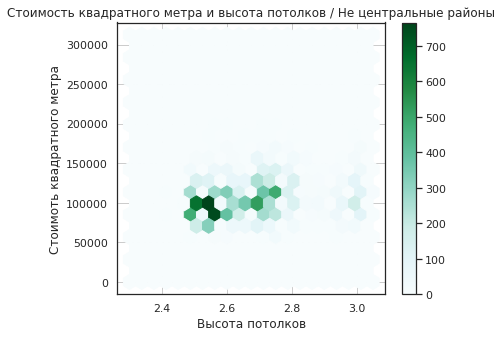

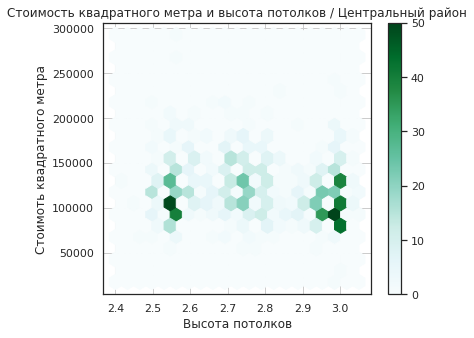

In [152]:
df_trust_data_spb.plot(x = 'ceiling_height', y = 'price_m', 
                       kind='hexbin', gridsize=20, figsize=(6, 5), sharex=False, grid=True)
plt.title('Стоимость квадратного метра и высота потолков / Не центральные районы')
plt.ylabel('Стоимоть квадратного метра')
plt.xlabel('Высота потолков')
plt.show()

df_trust_data_spb.query('city_center == True').plot(x = 'ceiling_height', 
                                                    y = 'price_m', kind='hexbin', 
                                                    gridsize=20, figsize=(6, 5), sharex=False, grid=True)
plt.title('Стоимость квадратного метра и высота потолков / Центральный район')
plt.ylabel('Стоимоть квадратного метра')
plt.xlabel('Высота потолков')
plt.show()

*В центре города большее количество квартир с высокими потолками, вне центра этажность квартир ниже. Стоимость квадратного метра не имеет прямой зависимости от высота потолка.*

### Апартаменты, студии и свободные планировки <a class="anchor" id="section_3_3"></a>

In [153]:
print('               Основные параметры Апартаментов в сравнении с прочими квартирами               ')
print()
df_trust_data.groupby('is_apartment').agg({'price_m' : 'median','floor':'median', 'total_area': 'mean', 
                                           'living_ratio': 'median', 'kitchen_ratio' : 'median', 
                                           'ceiling_height':'median','cityCenters_nearest':'mean'}).round(2)


               Основные параметры Апартаментов в сравнении с прочими квартирами               



,price_m,floor,total_area,living_ratio,kitchen_ratio,ceiling_height,cityCenters_nearest
is_apartment,,,,,,,
False,91591.59,5,51.12,0.56,0.18,2.6,14841.28
True,102969.35,3,54.59,0.55,0.18,2.7,17557.24


In [154]:
appartment = df_trust_data.query('is_apartment == True')
ht2 = appartment[['last_price', 'price_m', 'floor', 'total_area', 'living_ratio', 'kitchen_area', 
            'kitchen_ratio', 'ceiling_height', 'cityCenters_nearest']].corr()

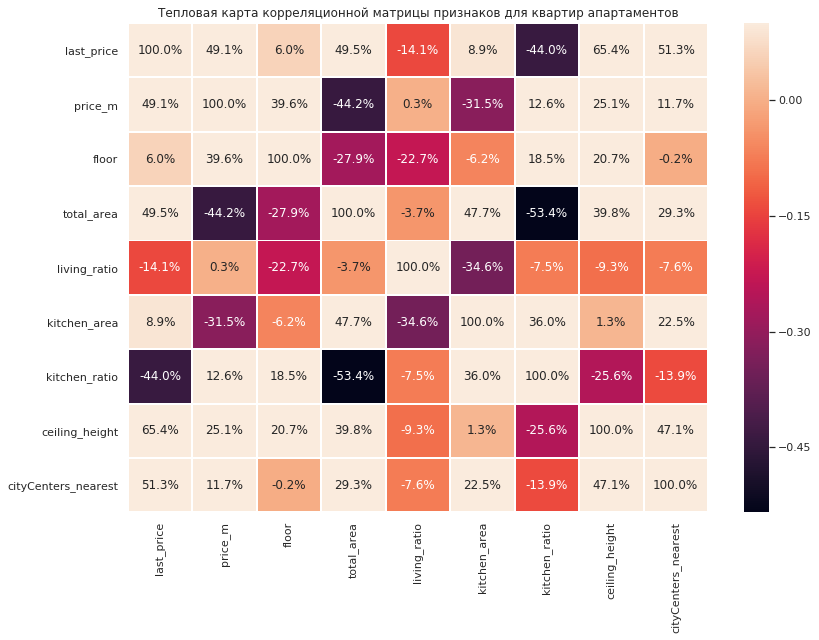

In [155]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта корреляционной матрицы признаков для квартир апартаментов')
sns.heatmap(ht2, vmax=0.1, annot=True, fmt='.1%', linewidths=1, linecolor='white')

*Для апартаментов характерно большая площадь, близость к центру и высокие потолки. На стоимость апартаментов в большей степени влияют этаж, высота потолков, близость к центру и общая площадь. Обратная коррекляция у апартаментов с соотношением площади кухни к общей площади - чем меньше площадь кухни, тем выше стоимость.*

In [156]:
print('               Основные параметры Студий в сравнении с прочими квартирами               ')
print()
df_trust_data.groupby('studio').agg({'price_m' : 'median','floor':'median', 'total_area': 'mean', 
                                           'living_ratio': 'median', 'kitchen_ratio' : 'median', 
                                           'ceiling_height':'median','cityCenters_nearest':'mean'}).round(2)


               Основные параметры Студий в сравнении с прочими квартирами               



,price_m,floor,total_area,living_ratio,kitchen_ratio,ceiling_height,cityCenters_nearest
studio,,,,,,,
False,91507.09,5,51.30,0.56,0.18,2.6,14853.39
True,104554.87,7,26.86,0.69,0.00,2.7,13533.59


*Площадь студий занчительно меньше прочий квартир, они больше удалены от центра города и располагаются на более высоких этажах (в более высотных домах). Однако стоимость квадратного метра значительно выше.* 

In [157]:
studio = df_trust_data.query('studio == True')
studio[['last_price', 'price_m', 'floor', 'total_area', 'living_ratio', 
        'kitchen_area', 'ceiling_height', 'cityCenters_nearest']].describe()
ht3 = studio[['last_price', 'price_m', 'floor', 'total_area', 
        'living_ratio', 'kitchen_area', 'ceiling_height', 'cityCenters_nearest']].corr()


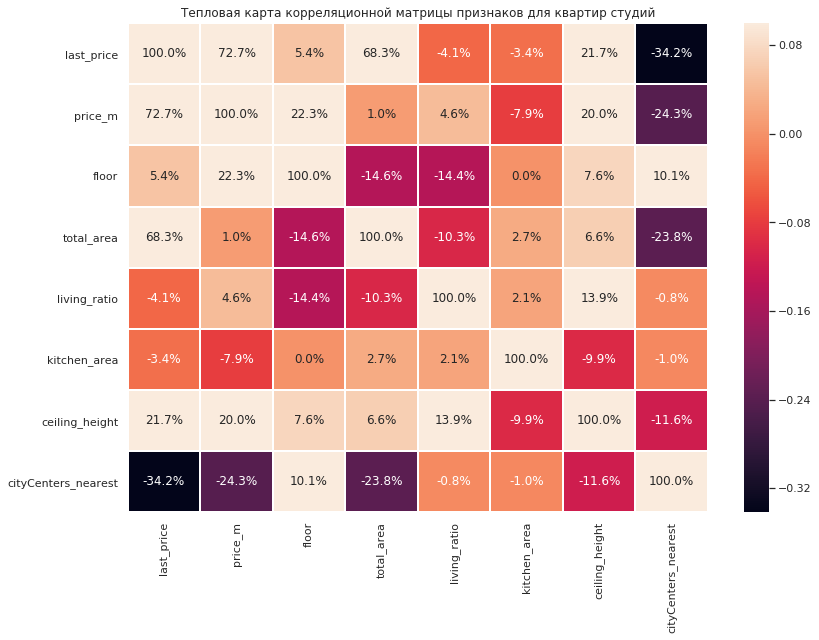

In [158]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта корреляционной матрицы признаков для квартир студий')
sns.heatmap(ht3, vmax=0.1, annot=True, fmt='.1%', linewidths=1, linecolor='white')

*В наибольшей степени на стоимость квартир-студий влияет ее площадь и в некоторой степени высота потолков, прочие параметре не имеют сильного веса.*

In [159]:
print('      Основные параметры квартир со свободной планировкой в сравнении с прочими квартирами         ')
print()
df_trust_data.groupby('open_plan').agg({'price_m' : 'median','floor':'median', 'total_area': 'mean', 
                                           'living_ratio': 'median', 'kitchen_ratio' : 'median', 
                                           'ceiling_height':'median','cityCenters_nearest':'mean'}).round(2)


      Основные параметры квартир со свободной планировкой в сравнении с прочими квартирами         



,price_m,floor,total_area,living_ratio,kitchen_ratio,ceiling_height,cityCenters_nearest
open_plan,,,,,,,
False,91557.77,5,51.21,0.56,0.18,2.6,14848.18
True,100000.00,8,28.96,0.68,0.00,2.7,13633.19


*Среди квартир со свободной планировкой, площадь меньше, но соотношение жилой и прощей площади больше. Для квартир со свободной планировкой характерны чуть более высокие потолки и большая стоимость за квадратный метр.*

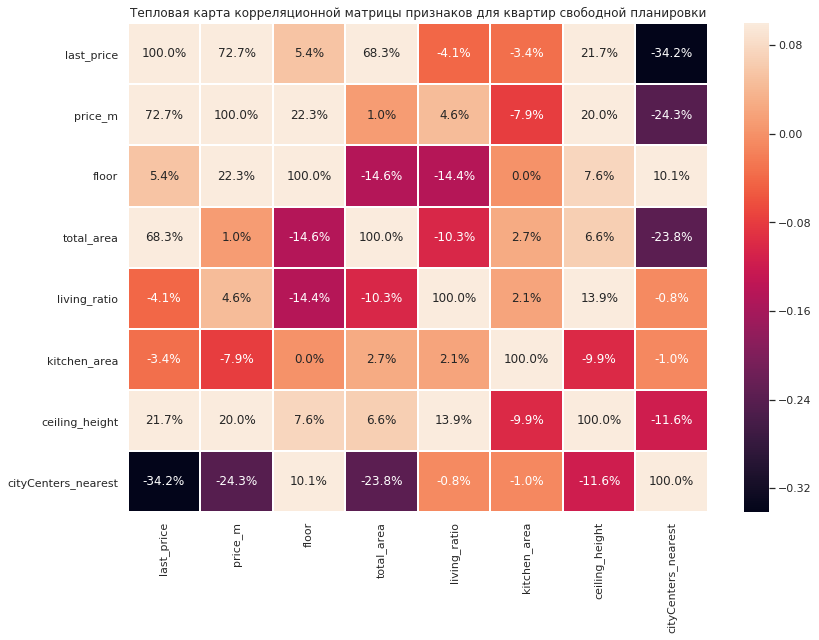

In [160]:
open_plan = df_trust_data.query('open_plan == True')
ht4 = open_plan[['last_price', 'price_m', 'floor', 'total_area', 'living_ratio', 'kitchen_area', 
            'kitchen_ratio', 'ceiling_height', 'cityCenters_nearest']].corr()
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Тепловая карта корреляционной матрицы признаков для квартир свободной планировки')
sns.heatmap(ht3, vmax=0.1, annot=True, fmt='.1%', linewidths=1, linecolor='white')

*Для квартир со свободной планировкой наибольшее влияние на цену имеет общая площадь, прощие параметры такого сильного влияния не имеют.*

## Выводы и рекомендации  <a class="anchor" id="chapter4"></a>

В датасете обнаружено большое количество пропущенных данных, данные пропуски заполнены исходя из аналогичных объявлений. 
Существют типичные квартиры, в среднем квартиры имеют схожие характеристики по высоте потолков, количеству комнат, площади общей и жилой/нежилой. Таких квартир 89%, но также есть квартиры  с очень высокой стоимостью или аномально высокими потолками. Такие квартиры встречаются нечасто, потому судить о достоверности данных не представляется возможным, впрочем, как и строить дальнейшие модели.
Также, в датасете присутствуют нежилые квартиры (апартаменты) и студии. Эти категории нетипичных квартир, однако, на их стоимость влияют те же параметры, что и на типичные квартиры: площадь, количество комнат, близость к центру. 
Квартиры в центре Петербурга отличает высокая стоимость, высокие потолки и низкоэтажные дома.

На основе полученных данных возможно построение модели автоматической оценки объявлений перед публикацией для предовтращения мошеннических действий на портале.